In [29]:
from datetime import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.figure import Figure
import typing as tp


class YouTube:
    def __init__(self, path_to_df: str = "RUvideos_short.csv"):
        # read csv
        self.df = pd.read_csv(path_to_df)

    def task1(self) -> pd.DataFrame:
        # Needed to change the format of datetime to reed it
        self.df['trending_date'] = pd.to_datetime(self.df['trending_date'], format="%y.%d.%m")
        return self.df

    def task2(self) -> pd.DataFrame:
        # Remove everything but date
        self.df['trending_date'] = self.df['trending_date'].dt.day

        # Update df according to required columns
        self.df = self.df[['trending_date', 'category_id', 'views', 'likes', 'dislikes', 'comment_count']]
        return self.df

    def task3(self) -> Figure:
        # Get required data
        views_by_day = self.df[['trending_date', 'views']]

        # Plot
        with sns.axes_style('whitegrid'):
            sns.boxplot(data=views_by_day, x='trending_date', y='views')

        # Format ticks
        plt.ticklabel_format(style='sci', scilimits=[-4, 4], axis='y', useMathText=True)

        # Add a title and axis labels to the plot
        plt.suptitle("Коробки с усами для просмотров по дням")
        plt.xlabel('День')
        plt.ylabel('Просмотры')
        return plt.gcf()

    def task4(self) -> Figure:
        # Get required data
        views_by_day = self.df[['trending_date', 'views']]

        # Plot
        with sns.axes_style('whitegrid'):
            sns.boxplot(data=views_by_day, x='trending_date', y='views', showfliers=True)

        # Format ticks
        plt.ticklabel_format(style='sci', scilimits=[-4, 4], axis='y', useMathText=True)

        # Set y limit
        plt.ylim((0, 550000))
        # Add a title and axis labels to the plot
        plt.suptitle("Коробки с усами для просмотров по дням")
        plt.xlabel('День')
        plt.ylabel('Просмотры')
        return plt.gcf()

    def task5(self) -> Figure:
        # Get required data
        views_likes = self.df[['likes', 'views']]

        # Plot
        with sns.axes_style('whitegrid'):
            g = sns.jointplot(data=views_likes, x="likes", y="views", alpha=0.5)
            g.fig.set_figwidth(10)
            g.fig.set_figheight(10)

        # Format ticks
        plt.ticklabel_format(style='sci', scilimits=[-4, 4], axis='both', useMathText=True)

        # Add a title and axis labels to the plot
        plt.suptitle("Просмотры и лайки", fontsize=15, y=1)
        plt.xlabel('Лайки', fontsize=15)
        plt.ylabel('Просмотры', fontsize=15)
        return plt.gcf()

    def task6(self) -> Figure:
        # Prepare Data without outliners
        views_likes = self.df[['likes', 'views']]
        likes_q = views_likes['likes'].quantile(0.75)
        views_q = views_likes['views'].quantile(0.75)
        views_likes = views_likes[(views_likes['likes'] < likes_q) & (views_likes['views'] < views_q)]

        # Plot
        with sns.axes_style('darkgrid'):
            g = sns.jointplot(data=views_likes, x="likes", y="views", alpha=0.5)
            g.fig.set_figwidth(10)
            g.fig.set_figheight(10)


        # Set x, y limits
        plt.ylim((0, 50000))
        plt.xlim((0, 2000))

        # Format ticks
        plt.ticklabel_format(style='sci', scilimits=[-4, 4], axis='both', useMathText=True)

        # Add a title and axis labels to the plot
        plt.suptitle("Просмотры и лайки", fontsize=15, y=1)
        plt.xlabel('Лайки', fontsize=15)
        plt.ylabel('Просмотры', fontsize=15)

        return plt.gcf()

    def task7(self) -> Figure:
        df = self.df
        quantiles = df.quantile()
        df = df[(df['views'] < quantiles['views']) & (df['likes'] < quantiles['likes'])]
        df['views'] /= 10 ** 4
        with sns.axes_style('whitegrid'):
            g = sns.jointplot(data=df, x='views', y='likes', alpha=.3)
            g.fig.set_figwidth(10)
            g.fig.set_figheight(10)
        # plt.figure(figsize=(9, 4))
        plt.suptitle("Количевто лайков в зависимости от количество просомтров", fontsize=20)
        plt.xlabel(r"Количество просмотров, $10^4$", fontsize=25)
        plt.ylabel("Количество лайков", fontsize=25)
        return plt.gcf()

In [30]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 10

In [31]:
plt.ioff()

In [32]:
yt_analysis = YouTube('../Data/task2_data/RUvideos_short.csv')

In [33]:
yt_analysis.task1()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,gDuslQ9avLc,2017-11-14,Захар и Полина учатся экономить,Т—Ж БОГАЧ,22,2017-11-13T09:09:31.000Z,"захар и полина|""учимся экономить""|""копить день...",62408,334,190,50,https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg,False,False,False,"Знакомьтесь, это Захар и Полина. Вместе с ними..."
1,AOCJIFEA_jE,2017-11-14,Биржа Мемов #29. Большой выпуск,Druzhko Show,22,2017-11-13T17:32:11.000Z,"биржа мемов|""лев шагинян""|""мемы""|""пикчи""|""друж...",330043,43841,2244,2977,https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg,False,False,False,"В 29 выпуске Дружко Шоу Сергей сказал, что Бир..."
2,VAWNQDgwwOM,2017-11-14,ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ,Юлик,24,2017-11-13T16:11:31.000Z,"юмор|""комедия""|""влог""|""блог""|""смешно""|""смешное...",424596,49854,714,2944,https://i.ytimg.com/vi/VAWNQDgwwOM/default.jpg,False,False,False,http://kapitany.ru/!Yulik.cap - Факультет #Кап...
3,gknkFwKQfHg,2017-11-14,Сочная кесадилья с курицей,Hochland,22,2017-11-13T06:51:10.000Z,"хохланд|""сыр""|""рецепты""|""как приготовить""|""вку...",112851,3566,122,80,https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg,False,False,False,*** как готовить ресторанные блюда дома
4,3sYvZcwzZr8,2017-11-14,КЛИПЫ РОДИТЕЛЕЙ НА ШКОЛЬНЫЙ ВЫПУСКНОЙ,Совергон,24,2017-11-13T16:52:36.000Z,"Совергон|""Sovergon""|""клипы""|""родители""|""школа""...",243469,36216,631,1692,https://i.ytimg.com/vi/3sYvZcwzZr8/default.jpg,False,False,False,❏ КОНКУРС КАПИТАНЫ: http://kapitany.ru/!Soverg...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1595,jH557u8P57g,2017-11-21,Жучков ГИБДД ЮЗАО. Операция не трезвый водител...,Геннадий Азаров,2,2017-11-20T09:19:25.000Z,"гибдд|""ДПС""|""ГАИ""|""МВД""|""УВД""|""ППС""|""мИЛИЦИЯ""|...",5498,373,19,49,https://i.ytimg.com/vi/jH557u8P57g/default.jpg,False,False,False,Одноклассники: https://ok.ru/gena.azarov\nТв...
1596,o_Go4duksR4,2017-11-21,КИТАЙСКИЙ ФАВОРИТ/FAW BESTURN X80/БОЛЬШОЙ ТЕСТ...,Большой тест-драйв,2,2017-11-20T15:14:31.000Z,"стиллавин|""вахидов""|""авто""|""машины""|""тест""|""ав...",40394,1339,179,201,https://i.ytimg.com/vi/o_Go4duksR4/default.jpg,False,False,False,Подписка на канал - http://www.youtube.com/use...
1597,jpT9k4G350Y,2017-11-21,Россия - Запад. Что хотят? - Полный Альбац 20 ...,РОССИЯ ЗАВТРА,25,2017-11-20T18:16:49.000Z,"Альбац|""20 ноября 2017""|""Эхо Москвы""",3516,65,7,4,https://i.ytimg.com/vi/jpT9k4G350Y/default.jpg,False,False,False,Россия - Запад. Что хотят? - Полный Альбац 20 ...
1598,KlOgfgGlAJM,2017-11-21,О невинно погибиших солдатах Вермахта (Руслан ...,PolitRussia,25,2017-11-20T11:09:04.000Z,"осташко|""пятиминутка""|""школьник""|""новый уренго...",47507,4372,231,2380,https://i.ytimg.com/vi/KlOgfgGlAJM/default.jpg,False,False,False,Не мог не высказаться по поводу выступления шк...


In [34]:
yt_analysis.task2()

,trending_date,category_id,views,likes,dislikes,comment_count
0,14,22,62408,334,190,50
1,14,22,330043,43841,2244,2977
2,14,24,424596,49854,714,2944
3,14,22,112851,3566,122,80
4,14,24,243469,36216,631,1692
...,...,...,...,...,...,...
1595,21,2,5498,373,19,49
1596,21,2,40394,1339,179,201
1597,21,25,3516,65,7,4
1598,21,25,47507,4372,231,2380


In [35]:
yt_analysis.task3();

In [36]:
yt_analysis.task4();

In [37]:
yt_analysis.task5();

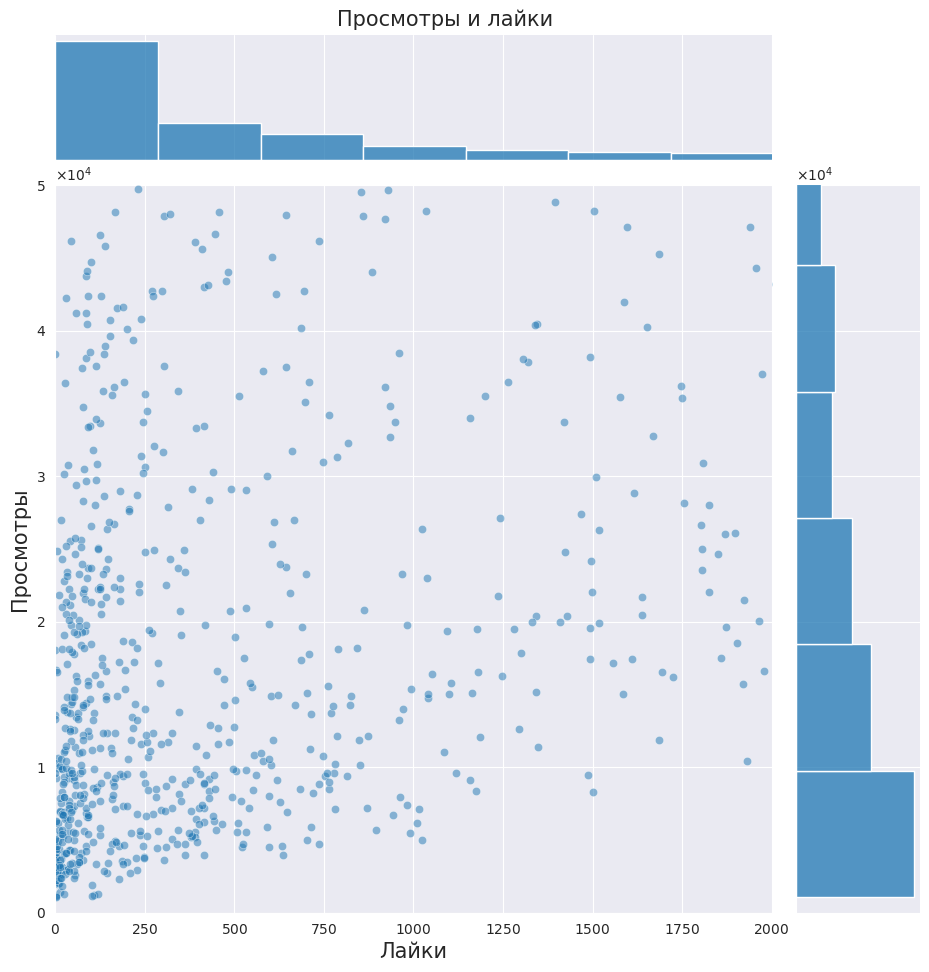

In [42]:
yt_analysis.task6()

In [39]:
yt_analysis.task7();

/tmp/ipykernel_92988/3015542367.py:115: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['views'] /= 10 ** 4
